## Generate the mesh

In [1]:
from mesh import three_cubes

size = 0.05
filename = f"meshes/mesh_{size}.msh"

three_cubes(filename, size=size)

Info    : Meshing 1D...nts                                                                                                             
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 20%] Meshing curve 4 (Line)
Info    : [ 20%] Meshing curve 5 (Line)
Info    : [ 20%] Meshing curve 6 (Line)
Info    : [ 30%] Meshing curve 7 (Line)
Info    : [ 30%] Meshing curve 8 (Line)
Info    : [ 30%] Meshing curve 9 (Line)
Info    : [ 40%] Meshing curve 10 (Line)
Info    : [ 40%] Meshing curve 11 (Line)
Info    : [ 40%] Meshing curve 12 (Line)
Info    : [ 50%] Meshing curve 13 (Line)
Info    : [ 50%] Meshing curve 14 (Line)
Info    : [ 60%] Meshing curve 15 (Line)
Info    : [ 60%] Meshing curve 16 (Line)
Info    : [ 60%] Meshing curve 17 (Line)
Info    : [ 70%] Meshing curve 18 (Line)
Info    : [ 70%] Meshing curve 19 (Line)
Info    : [ 70%] Meshing curve 20 (Line)
Info    : [ 80%] Meshing curve 21 (Line)
Info    : [ 

In [2]:
from convert_mesh import convert_mesh

volume_file = f"meshes/mesh_{size}.xdmf"
facet_file = f"meshes/mesh_{size}_facet.xdmf"

print(filename, volume_file, facet_file)
nb_cells, nb_facets = convert_mesh(filename, volume_file, facet_file)


meshes/mesh_0.05.msh meshes/mesh_0.05.xdmf meshes/mesh_0.05_facet.xdmf

Surface IDs:  [4 5 6 7]
Volume IDs:  [1 2 3]


In [3]:
def run(volume_file: str, facet_file: str) -> float:
    from script_festim_2 import run_festim_2
    import time

    start = time.perf_counter()
    run_festim_2(volume_file, facet_file)
    end = time.perf_counter()

    elapsed_time = end - start


    return elapsed_time


In [8]:
import ipyparallel as ipp
import numpy as np

# check if we are in github actions
import os
if "CI" in os.environ:
    num_procs = [1, 2, 4]
else:
    num_procs = [1, 2, 4, 8, 16]

runtimes = np.zeros_like(num_procs, dtype=np.float64)

for i, num_proc in enumerate(num_procs):
    print(f"Running with {num_proc} processes")


    # start an ipyparallel cluster and connect to it
    cluster = ipp.Cluster(engines="mpi", n=num_proc)
    rc = cluster.start_and_connect_sync()

    # run the function run in parallel
    query = rc[:].apply_async(run, volume_file, facet_file)
    query.wait()

    # get the results for all processes
    elapsed_times = query.get()
    rc.cluster.stop_cluster_sync()
    cluster.stop_cluster()

    print(elapsed_times)
    rc.cluster.stop_cluster_sync()
    cluster.stop_cluster()

    runtime = np.max(elapsed_times)
    print(f"Elapsed times: {elapsed_times} seconds, max {runtime=:.2e}")

    runtimes[i] = runtime

Running with 1 processes
Starting 1 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>
100%|██████████| 1/1 [00:05<00:00,  5.48s/engine]
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 633137, 'identifier': 'ipcontroller-1730233272-1l09-630183'}
Stopping engine(s): 1730233273
Output for ipengine-1730233272-1l09-1730233273-630183:
2024-10-29 16:21:13.866 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-29 16:21:13.866 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-29 16:21:13.943 [IPEngine] Registering with controller at tcp://127.0.0.1:57581
2024-10-29 16:21:13.944 [IPEngine] Shell_addrs: ['tcp://127.0.0.1:40675', 'tcp://127.0.0.1:38729', 'tcp://127.0.0.1:52757']
2024-10-29 16:21:13.945 [IPEngine] Connecting shell to tcp://127.0.0.1:40675
2024-10-29 16:21:13.945 [IPEngine] Connecting shell to tcp://127.0.0.1:38729
2024-10-29 16:21:13.945 [IPEngine] Connecting shell to tcp://127.0.0.1:52757
2024-10-29 16:21:13.945 [IPEn

In [5]:
def run_change_of_var(volume_file: str, facet_file: str) -> float:
    from script_festim_2 import run_festim_2_change_of_var
    import time

    start = time.perf_counter()
    run_festim_2_change_of_var(volume_file, facet_file)
    end = time.perf_counter()

    elapsed_time = end - start


    return elapsed_time


import ipyparallel as ipp
import numpy as np

# check if we are in github actions
import os
if "CI" in os.environ:
    num_procs = [1, 2, 4]
else:
    num_procs = [1, 2, 4, 8, 16]

runtimes_change_of_var = np.zeros_like(num_procs, dtype=np.float64)

for i, num_proc in enumerate(num_procs):
    print(f"Running with {num_proc} processes")


    # start an ipyparallel cluster and connect to it
    cluster = ipp.Cluster(engines="mpi", n=num_proc)
    rc = cluster.start_and_connect_sync()

    # run the function run in parallel
    query = rc[:].apply_async(run_change_of_var, volume_file, facet_file)
    query.wait()

    # get the results for all processes
    elapsed_times = query.get()
    rc.cluster.stop_cluster_sync()
    cluster.stop_cluster()

    print(elapsed_times)
    rc.cluster.stop_cluster_sync()
    cluster.stop_cluster()

    runtime = np.max(elapsed_times)
    print(f"Elapsed times: {elapsed_times} seconds, max {runtime=:.2e}")

    runtimes_change_of_var[i] = runtime


Running with 1 processes
Starting 1 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>
100%|██████████| 1/1 [00:05<00:00,  5.47s/engine]
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 630445, 'identifier': 'ipcontroller-1730233067-9bju-630183'}
Stopping engine(s): 1730233068
Output for ipengine-1730233067-9bju-1730233068-630183:
2024-10-29 16:17:49.151 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-29 16:17:49.151 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-29 16:17:49.217 [IPEngine] Registering with controller at tcp://127.0.0.1:51443
2024-10-29 16:17:49.219 [IPEngine] Shell_addrs: ['tcp://127.0.0.1:47901', 'tcp://127.0.0.1:55369', 'tcp://127.0.0.1:60561']
2024-10-29 16:17:49.219 [IPEngine] Connecting shell to tcp://127.0.0.1:47901
2024-10-29 16:17:49.219 [IPEngine] Connecting shell to tcp://127.0.0.1:55369
2024-10-29 16:17:49.219 [IPEngine] Connecting shell to tcp://127.0.0.1:60561
2024-10-29 16:17:49.219 [IPEn

100%|██████████| 1/1 [00:05<00:00,  5.48s/engine]


/tmp/ipykernel_630183/2137199539.py:42: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()
/tmp/ipykernel_630183/2137199539.py:46: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()


Starting 2 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>
100%|██████████| 2/2 [00:05<00:00,  2.70s/engine]
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 631071, 'identifier': 'ipcontroller-1730233125-dyka-630183'}
Stopping engine(s): 1730233126
Output for ipengine-1730233125-dyka-1730233126-630183:
2024-10-29 16:18:47.125 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-29 16:18:47.126 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-29 16:18:47.126 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-29 16:18:47.126 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-29 16:18:47.188 [IPEngine.0] Registering with controller at tcp://127.0.0.1:40121
2024-10-29 16:18:47.188 [IPEngine.1] Registering with controller at tcp://127.0.0.1:40121
2024-10-29 16:18:47.189 [IPEngine.0] Requesting id: 0
2024-10-29 16:18:47.189 [IPEngine.1] Requesting id: 1
2024-10-29 16:18:47.190 [IPEngine.1] Shell_addrs: [

/tmp/ipykernel_630183/2137199539.py:42: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()
/tmp/ipykernel_630183/2137199539.py:46: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()


Starting 4 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>
100%|██████████| 4/4 [00:05<00:00,  1.37s/engine]
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 631444, 'identifier': 'ipcontroller-1730233157-kkbu-630183'}
Stopping engine(s): 1730233158
Output for ipengine-1730233157-kkbu-1730233158-630183:
2024-10-29 16:19:18.870 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-29 16:19:18.870 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-29 16:19:18.870 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-29 16:19:18.870 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-29 16:19:18.873 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-29 16:19:18.873 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-29 16:19:18.880 [IPEngine] Loading connection info from $IPP_CONNECTION_INFO
2024-10-29 16:19:18.880 [IPEngine] WARNING | Not using CurveZMQ security
2024-10-29 16:19:18.948

/tmp/ipykernel_630183/2137199539.py:42: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()
/tmp/ipykernel_630183/2137199539.py:46: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()


Starting 8 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>
100%|██████████| 8/8 [00:05<00:00,  1.45engine/s]
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 631791, 'identifier': 'ipcontroller-1730233183-uuhk-630183'}
Stopping engine(s): 1730233184
Output for ipengine-1730233183-uuhk-1730233184-630183:
2024-10-29 16:19:44.551 [IPEngine.6] Connecting shell to tcp://127.0.0.1:59789
2024-10-29 16:19:44.551 [IPEngine.2] Shell_addrs: ['tcp://127.0.0.1:49897', 'tcp://127.0.0.1:36223', 'tcp://127.0.0.1:59789']
2024-10-29 16:19:44.551 [IPEngine.6] Starting nanny
2024-10-29 16:19:44.551 [IPEngine.2] Connecting shell to tcp://127.0.0.1:49897
2024-10-29 16:19:44.551 [IPEngine.2] Connecting shell to tcp://127.0.0.1:36223
2024-10-29 16:19:44.551 [IPEngine.2] Connecting shell to tcp://127.0.0.1:59789
2024-10-29 16:19:44.551 [IPEngine.2] Starting nanny
2024-10-29 16:19:44.551 [IPEngine.4] Shell_addrs: ['tcp://127.0.0.1:49897', 'tcp://127.0.0.1:36223', 'tcp://1

/tmp/ipykernel_630183/2137199539.py:42: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()
/tmp/ipykernel_630183/2137199539.py:46: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()


Starting 16 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>
100%|██████████| 16/16 [00:05<00:00,  2.85engine/s]
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 632242, 'identifier': 'ipcontroller-1730233210-a6cx-630183'}
Stopping engine(s): 1730233211
Output for ipengine-1730233210-a6cx-1730233211-630183:

2024-10-29 16:20:12.577 [IPEngine.11] WARNING | debugpy_stream undefined, debugging will not be enabled
2024-10-29 16:20:12.578 [IPEngine.8] WARNING | debugpy_stream undefined, debugging will not be enabled
2024-10-29 16:20:12.578 [IPEngine.0] WARNING | debugpy_stream undefined, debugging will not be enabled
2024-10-29 16:20:12.579 [IPEngine.11] Starting to monitor the heartbeat signal from the hub every 3500 ms.
2024-10-29 16:20:12.579 [IPEngine.11] Completed registration with id 11
2024-10-29 16:20:12.579 [IPEngine.7] Starting to monitor the heartbeat signal from the hub every 3500 ms.
2024-10-29 16:20:12.579 [IPEngine.7] Completed registrat

/tmp/ipykernel_630183/2137199539.py:42: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()
/tmp/ipykernel_630183/2137199539.py:46: RuntimeWarning: coroutine 'Cluster.stop_cluster' was never awaited
  cluster.stop_cluster()


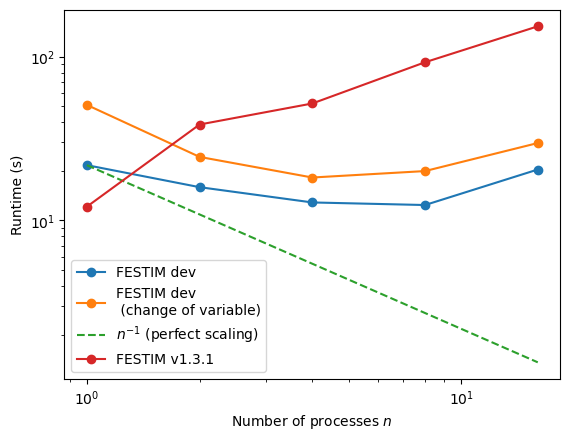

In [9]:
import matplotlib.pyplot as plt
from festim import __version__

plt.plot(num_procs, runtimes, marker="o", label=f"FESTIM dev")
plt.plot(num_procs, runtimes_change_of_var, marker="o", label="FESTIM dev \n (change of variable)")

n = np.linspace(1, 16, 100)
plt.plot(n, runtimes[0] * n**-1, linestyle="--", label="$n^{-1}$ (perfect scaling)")

plt.xlabel("Number of processes $n$")
plt.ylabel("Runtime (s)")

plt.xscale("log")
plt.yscale("log")

# check that runtimes_festim_1.csv exists and plot the results
try:
    import pandas as pd
    data = pd.read_csv("runtimes_festim_1.csv")
    plt.plot(data["num_procs"], data["runtimes"], marker="o", label="FESTIM v1.3.1")
except FileNotFoundError:
    print("File runtimes_festim_1.csv not found")

plt.legend()
plt.show()

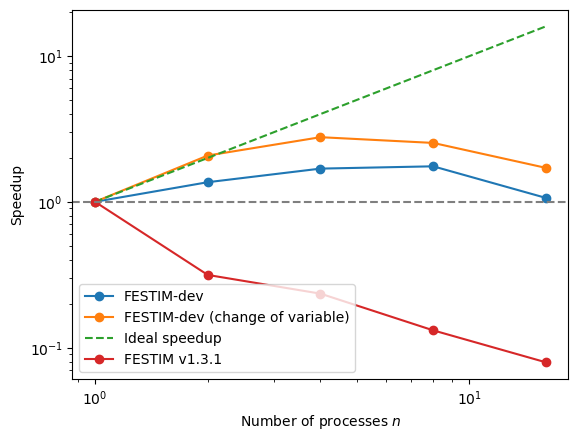

In [12]:
speedup = runtimes[0] / runtimes

plt.plot(num_procs, speedup, marker="o", label=f"FESTIM-dev")
plt.plot(num_procs, runtimes_change_of_var[0] / runtimes_change_of_var, marker="o", label="FESTIM-dev (change of variable)")
# ideal speedup
plt.plot(n, n, linestyle="--", label="Ideal speedup")


try:
    import pandas as pd
    data = pd.read_csv("runtimes_festim_1.csv")
    speedup = data["runtimes"][0] / data["runtimes"]
    plt.plot(data["num_procs"], speedup, marker="o", label="FESTIM v1.3.1")
except FileNotFoundError:
    print("File runtimes_festim_1.csv not found")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of processes $n$")
plt.ylabel("Speedup")

# horizontal line at 1
plt.axhline(1, color="tab:grey", linestyle="--")

plt.legend()
plt.show()